In [61]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

0.9999999841442331
[2.52794578e-04 3.74594764e-04 5.50072828e-04 8.00054254e-04
 1.15228549e-03 1.64322592e-03 2.32011942e-03 3.24331859e-03
 4.48880225e-03 6.15078697e-03 8.34428506e-03 1.12074098e-02
 1.49031736e-02 1.96204744e-02 2.55739258e-02 3.30021635e-02
 4.21642627e-02 5.33339420e-02 6.67913043e-02 8.28119911e-02
 1.01653793e-01 1.23540970e-01 1.48646773e-01 1.77074905e-01
 2.08840923e-01 2.43854766e-01 2.81905757e-01 3.22651507e-01
 3.65612055e-01 4.10170450e-01 4.55580669e-01 5.00983314e-01
 5.45429082e-01 5.87909361e-01 6.27392779e-01 6.62865951e-01
 6.93376253e-01 7.18074115e-01 7.36252250e-01 7.47379280e-01
 7.51125536e-01 7.47379284e-01 7.36252259e-01 7.18074127e-01
 6.93376269e-01 6.62865971e-01 6.27392800e-01 5.87909384e-01
 5.45429109e-01 5.00983344e-01 4.55580701e-01 4.10170483e-01
 3.65612087e-01 3.22651539e-01 2.81905787e-01 2.43854793e-01
 2.08840949e-01 1.77074928e-01 1.48646795e-01 1.23540992e-01
 1.01653815e-01 8.28120143e-02 6.67913302e-02 5.33339725e-02
 4.21

C:\Users\elan5\AppData\Local\Temp\ipykernel_30808\1253311528.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm = y[:,0] / np.sqrt(np.trapz(y[:,0]**2, xspan))


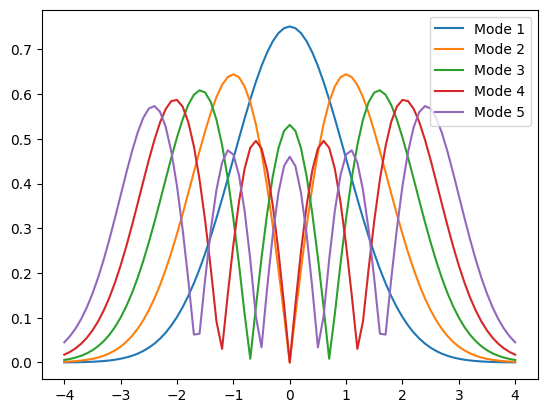

In [62]:
def bvp(y, x, k, epsilon_n):
    return [y[1], (k * (x**2) - epsilon_n) * y[0]]

L = 4
K = 1
xspan = np.arange(-L, L + 0.1, 0.1)
epsilon_start = 0.2
tol = 1e-4
A1 = []
A2 = []

for mode in range(1, 6):
    epsilon_n = epsilon_start
    y0 = [1, np.sqrt(L**2 - epsilon_n)]
    depsilon = 0.1

    for _ in range(1000):
        y = odeint(bvp, y0, xspan, args = (K, epsilon_n))
        temp = y[-1, 1] + np.sqrt(L**2 - epsilon_n) * y[-1, 0]

        if abs(temp) < tol:
            print(epsilon_n)
            A2.append(epsilon_n)
            break

        if (-1)**(mode + 1) * temp > 0:
            epsilon_n += depsilon
        else:
            epsilon_n -= depsilon / 2
            depsilon /= 2

    epsilon_start = epsilon_n + 2

    norm = y[:,0] / np.sqrt(np.trapz(y[:,0]**2, xspan))
    A1.append(norm)
    plt.plot(xspan, abs(norm.T), label=f'Mode {mode}')
    plt.legend()
    print(norm, epsilon_n)

A1 = np.column_stack([np.abs(ef) for ef in A1])
A2 = np.array(A2)


In [63]:
A1, A2[:5]


(array([[2.52794578e-04, 1.45461738e-03, 5.66711174e-03, 1.74589010e-02,
         4.50530739e-02],
        [3.74594764e-04, 2.08377490e-03, 7.88695814e-03, 2.35400249e-02,
         5.86305035e-02],
        [5.50072828e-04, 2.96901782e-03, 1.09156761e-02, 3.15583319e-02,
         7.58493203e-02],
        [8.00054254e-04, 4.19588715e-03, 1.49786787e-02, 4.19281252e-02,
         9.71906716e-02],
        [1.15228549e-03, 5.87359614e-03, 2.03472418e-02, 5.51048484e-02,
         1.23081541e-01],
        [1.64322592e-03, 8.13893182e-03, 2.73391700e-02, 7.15654006e-02,
         1.53831778e-01],
        [2.32011942e-03, 1.11600069e-02, 3.63163651e-02, 9.17795168e-02,
         1.89560320e-01],
        [3.24331859e-03, 1.51394491e-02, 4.76780812e-02, 1.16171090e-01,
         2.30113637e-01],
        [4.48880225e-03, 2.03165046e-02, 6.18486350e-02, 1.45069159e-01,
         2.74981891e-01],
        [6.15078697e-03, 2.69674234e-02, 7.92584570e-02, 1.78649431e-01,
         3.23220827e-01],
        [8

In [65]:
A1.shape

(81, 5)